# Group 5
# Your Uni : yd2798; jy3482; zz3256
# Your Full name : Yixuan Ding; Jingyi Yan; Zihui Zhuang.
# Link to your Public Github repository with Final report  : https://github.com/Zihui-Z/ADV_ML_Project_1


# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

whr_df = pd.read_csv('WHR_2023.csv')

In [ ]:
whr_df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


We load the World Happiness Report 2023 dataset using pandas. The data contains 9 variables: country, region, happiness score, GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. There are 137 rows, meaning 137 countries in total.

In [ ]:
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes

We discretize the happiness score into five categories (Very Low, Low, Average, High, Very High) using pd.qcut().

We then drop unnecessary columns and split the dataset into training and testing sets with train_test_split(). This will robust our evaluation of models.

We change the categorical labels into numerical codes using .astype('category').cat.codes to make them suitable for machine learning models. We converts the categorical values (Very Low, Low, Average, High, Very High) into numerical representations (0, 1, 2, 3, 4).

Loading the New Country Variables datasets

In [ ]:
countrydata = pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


We load a new dataset New Country Variables that contains additional country-level variables including country name, population, pooulation below poverty line, hdi, life expectancy, expexted years of schooling, mean years of schooling, and gni.

In [ ]:
common_countries = set(whr_df['country']).intersection(set(countrydata['country_name']))
print(f"The number of common countries: {len(common_countries)}")

X_train = X_train.merge(countrydata, left_on="country", right_on="country_name", how="left").drop(columns=["country_name"])
X_test = X_test.merge(countrydata, left_on="country", right_on="country_name", how="left").drop(columns=["country_name"])

The number of common countries: 128


We have 128 common countries in total. We then merge the 2 datasets together with the left join method. The head of the training dataset after merged is shown below.

In [ ]:
X_train.head()

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397
1,Mauritania,Sub-Saharan Africa,1.099,0.764,0.244,0.320,0.130,0.195,4420184.0,31.0,0.513106,63.239,8.46379,4.266000,3527.264154
2,Mongolia,East Asia,1.379,1.494,0.244,0.425,0.239,0.058,3075647.0,21.6,0.734832,69.806,14.84552,9.750000,10449.207270
3,Tajikistan,Commonwealth of Independent States,0.972,1.248,0.291,0.599,0.104,0.292,8921343.0,31.5,0.627472,69.582,11.26186,10.355820,2600.585607
4,Ukraine,Central and Eastern Europe,1.358,1.354,0.355,0.551,0.265,0.016,44222947.0,24.1,0.743049,71.129,15.30672,11.340000,7361.011228


## 1.  EDA

Now we start our EDA process. We take a look at the data type of each variable in X_train DataFrame after merging:

In [ ]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


There are 2 categorical columns: 'country' and 'region', and 13 numerical variables, including indicators across economics, social well-being, demographic, education, and health areas.

We then test the missing condition:

In [ ]:
missing_values = X_train.isnull().sum()
missing_percentage = (missing_values / len(X_train)) * 100

missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage of Missing (%)": missing_percentage})
print(missing_df)

                               Missing Values  Percentage of Missing (%)
country                                     0                   0.000000
region                                      0                   0.000000
gdp_per_capita                              0                   0.000000
social_support                              0                   0.000000
healthy_life_expectancy                     0                   0.000000
freedom_to_make_life_choices                0                   0.000000
generosity                                  0                   0.000000
perceptions_of_corruption                   0                   0.000000
population                                  6                   6.315789
population_below_poverty_line              16                  16.842105
hdi                                         6                   6.315789
life_expectancy                             7                   7.368421
expected_years_of_schooling                 7      

We can see the missing values' condition above.

*   Population has 6.3% of missing values.
*   Population below poverty line has 16.8% of missing values.
*   Hdi has 6.3% of missing values.
*   Life expectancy below poverty line has 7.4% of missing values.
*   Expected years of shooling has 7.4% of missing values.
*   Mean years of schooling has 7.4% of missing values.
*   Gni has 7.4% of missing values.



We will select some important numeric variables to see the frequency distribution. To be sepcific, we select one variable from each of the 5 aspects mentioned above:

For economics, I select "gdp_per_capita".

For social well-being, I select "social_support".

For demographics, I select "population_below_poverty_line" and "hdi".

For education, I select "mean_years_of_schooling".

For health, I select "life_expectancy".

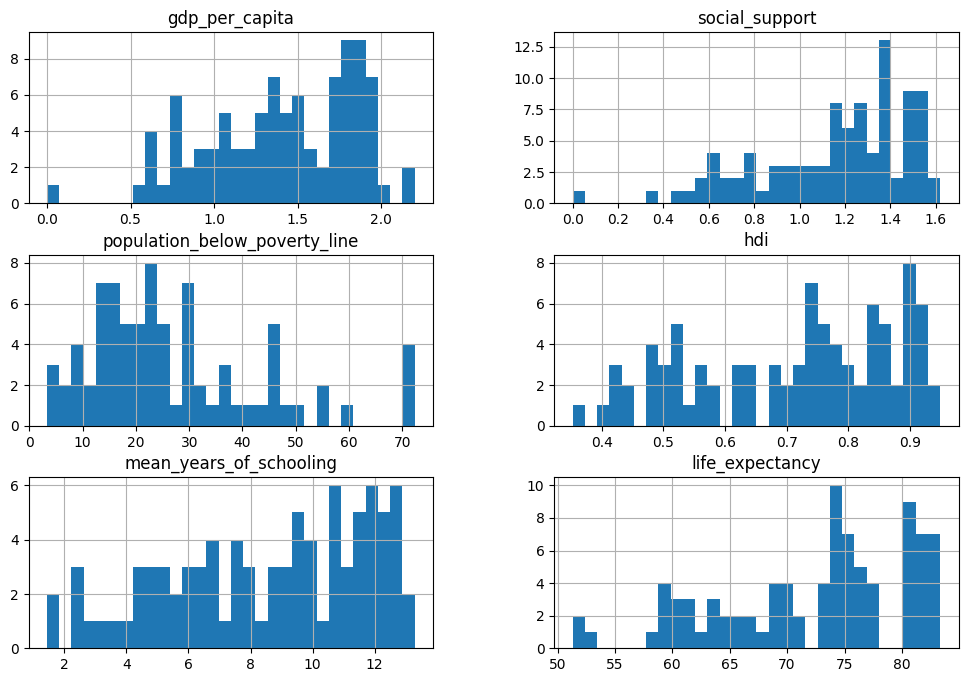

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

important_var = ["gdp_per_capita", "social_support", "population_below_poverty_line", "hdi", "mean_years_of_schooling", "life_expectancy"]

X_train[important_var].hist(figsize=(12, 8), bins=30)
plt.show()

The gdp_per_capita is right skewed. This suggests wealth is not evenly distributed across countries. Social support concentrated around 1.0 to 1.6, which reflects most countries provide moderate to high social support. Hdi typically are moderate to high, population below poverty line are medium low. Mean years of schooling tends to increase toward the right, showing many countries achieving higher education levels (10-12 years). Life expectancy demonstrates two distinct clusters around 60-65 years and 75-80 years, likely representing developing and developed nations respectively.

We then plot the  categorical variable. The first plot is the ditribution of “region”.

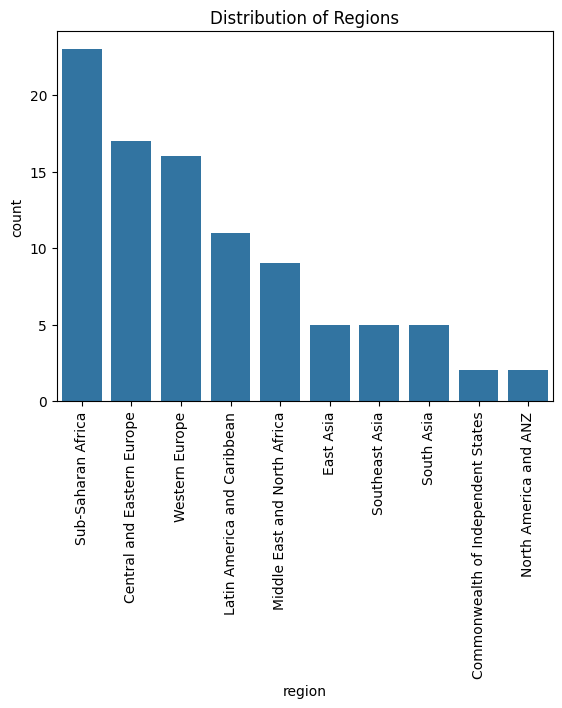

In [ ]:
sns.countplot(data=X_train, x="region", order=X_train["region"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Regions")
plt.show()

The bar chart shows the distribution of regions in the dataset. Sub-Saharan Africa has the highest number of countries. Central and Eastern Europe and Western Europe follow as the second and third. The Commonwealth of Independent States and North America and ANZ (Australia/New Zealand) has the least number of countries.

The dataset covers African and European regions comprehensively but has limited coverage to Asia and North America.

The second categorical plot is the happiness categories acorss regions.

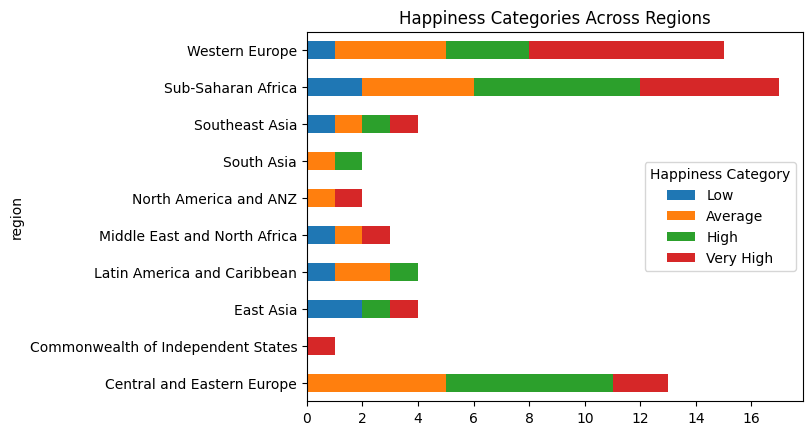

In [ ]:
region_happiness = pd.crosstab(X_train['region'], y_train)
region_happiness.plot(kind='barh',stacked=True)
plt.title('Happiness Categories Across Regions')
plt.legend(title='Happiness Category')
plt.show()

This stacked bar shows the regional variations in happiness categories across the world. West Eourpe, Southeast Asia and Sub-Saharan Africa are almost evenly distributed in the happiness categories. Central and Eastern Europe has no low happiness. It primarly concentrated in the average to high range. Commonwealth of Independent Staes only have very high data. However, the data sample for Commonwealth of Independent Staes is low and limited. South Asia and North Amercia & ANZ also has no low value.

Now we want to see the relationships between variables. The first method is using Pearson correlation coefficients.

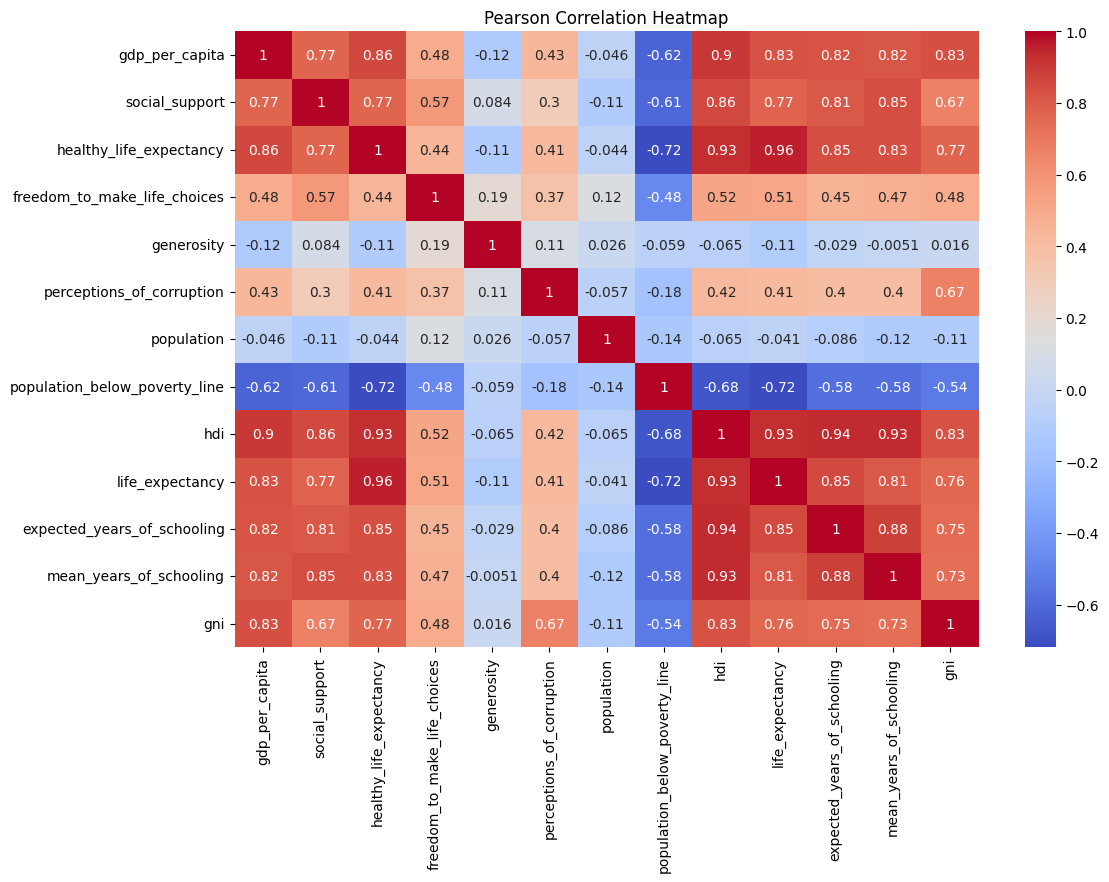

In [ ]:
numerical = X_train.select_dtypes(include=['float64', 'int64']).columns

pearson_corr = X_train[numerical].corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, cmap='coolwarm', annot=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

We then use Spearman correlation coefficients.

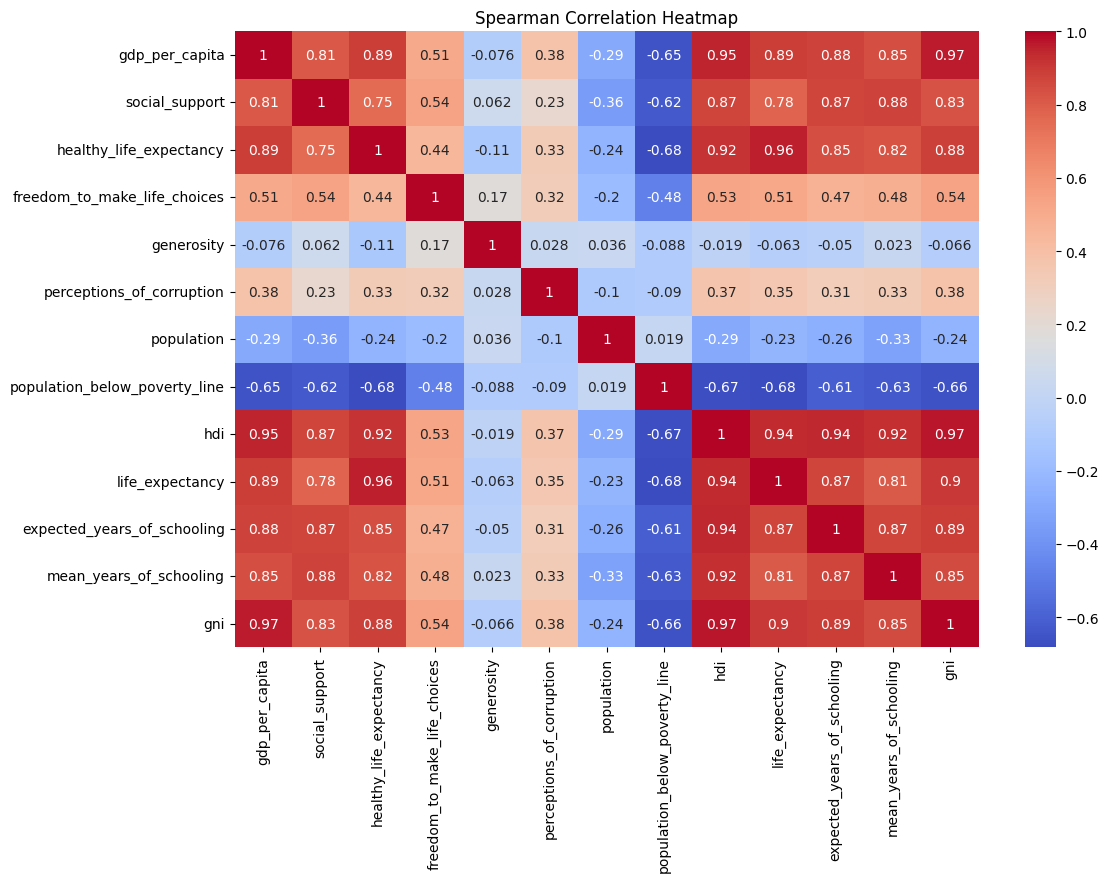

In [ ]:
spearman_corr = X_train[numerical].corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=True)
plt.title('Spearman Correlation Heatmap')
plt.show()

We finally use Kendall correlation coefficients.

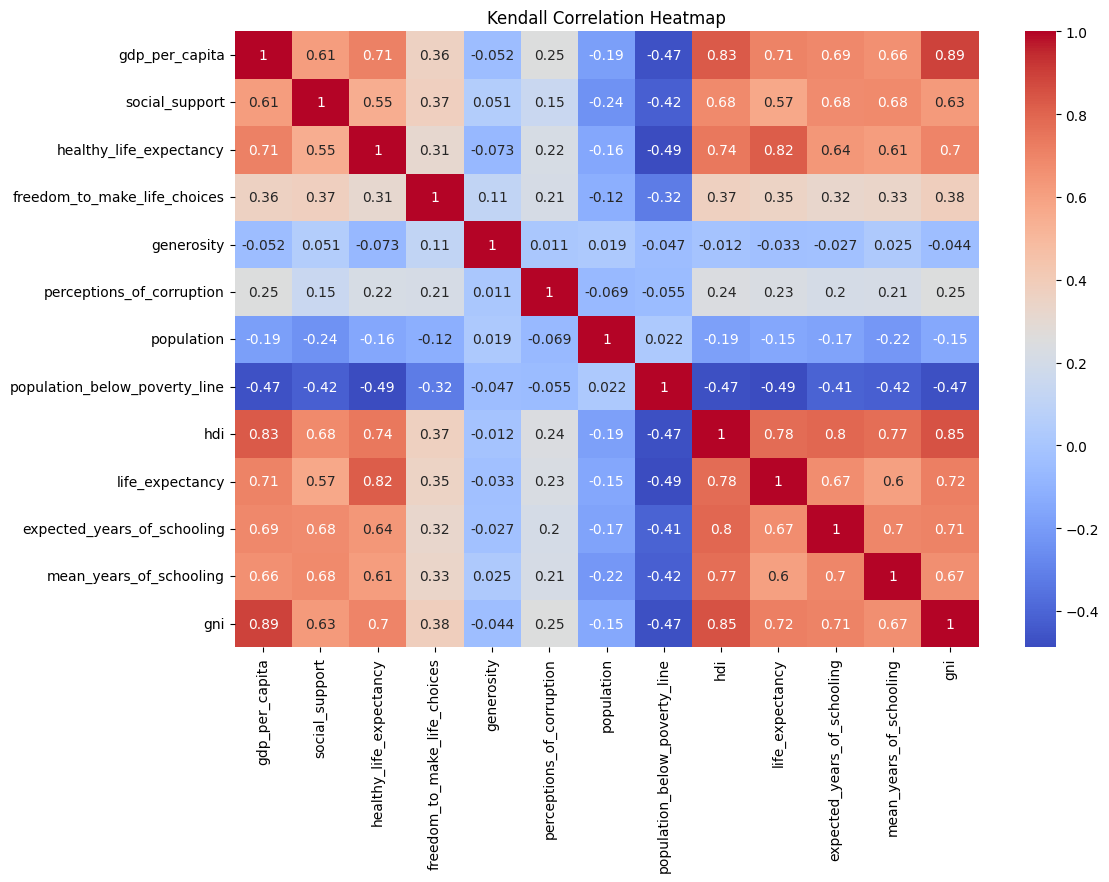

In [ ]:
kendall_corr = X_train[numerical].corr(method='kendall')

plt.figure(figsize=(12, 8))
sns.heatmap(kendall_corr, cmap='coolwarm', annot=True)
plt.title('Kendall Correlation Heatmap')
plt.show()

All three correlation methods (Pearson, Spearman, and Kendall) shows gdp_per_capita has high positive relationship with gni, with correlation coefficients of 0.83 (Pearson), 0.97 (Spearman), and 0.89 (Kendall). The relationship between hdi and gni is also high: 0.83 (Pearson), 0.97 (Spearman), and 0.85 (Kendall). This might because countries' income levels strongly predict the human development status.

Population below poverty line shows moderate to strong negative correlations with the development indicators like gdp, hdi, and particularly healthy life expectancy: -0.72 for Pearson, -0.68 for Spearman, -0.49 for Kendall.

To explore the relationships between variables, we first conduct a correlation table:

In [ ]:
target_corrs = X_train[numerical].corrwith(y_train_labels, method='spearman').sort_values(ascending=False)

print("Correlation Table Between Variables and Happiness Category")
print(target_corrs)

Correlation Table Between Variables and Happiness Category
population_below_poverty_line    0.127085
expected_years_of_schooling      0.074950
perceptions_of_corruption        0.058748
social_support                   0.048397
generosity                       0.025733
hdi                              0.020882
healthy_life_expectancy          0.018047
freedom_to_make_life_choices     0.009483
life_expectancy                 -0.013312
gdp_per_capita                  -0.013474
mean_years_of_schooling         -0.026189
gni                             -0.029662
population                      -0.232541
dtype: float64


We then choose the top 5 correlated variables with the happines category using the abosulute value.

The top 5 variables are:


*   population
*   population_below_poverty_line
*   expected_years_of_schooling
*   perceptions_of_corruption
*   social_support




In [ ]:
abs_corrs = target_corrs.abs().sort_values(ascending=False)
top_features = list(abs_corrs.head(5).index)

plot_df = X_train[top_features].copy()
plot_df['happiness_category'] = y_train
plot_df['happiness_numeric'] = y_train_labels

We draw the heatmap to see the top 5 features' correlation.

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = plot_df[top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top 5 Features')
plt.show()

From the heatmap we can see the expected years of schooling has high postive correlation with social support. The popolation below poverty line has strong negative correlation with social support and expected years of schooling.

We then draw the pairplot to see the pairwise relationships by happiness category.

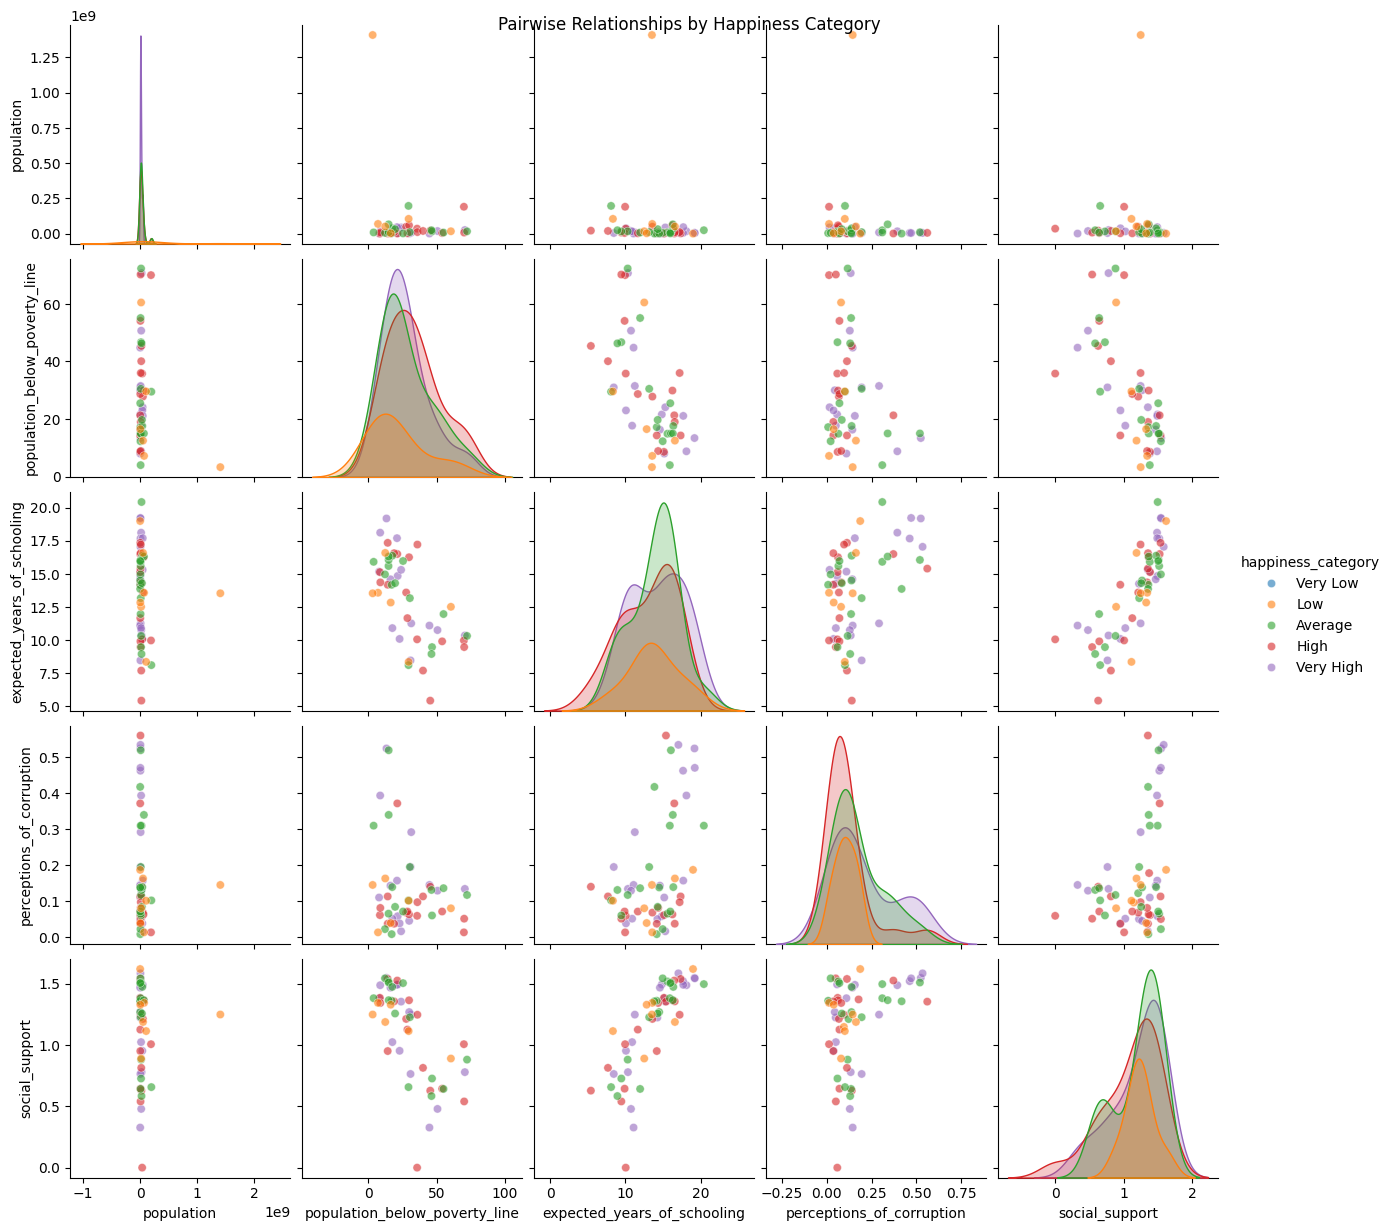

In [ ]:
sns.pairplot(plot_df, hue='happiness_category', vars=top_features, plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairwise Relationships by Happiness Category')
plt.show()

Population shows a significant outliers, which might be populated countries like China and India. The happiness categories don't vary alot with the population size, showing the population might has a weak weak correlation with happiness.

If we look at the population below poverty line, we can find countries with "Very High" happiness (purple) tend to have lower poverty rates (mostly below 20%).

For expected years of schooling, countries with more expected years of schooling (higher education) tends to have higher happiness rate.

Perceptions of corruption shows a mixed distribution. There's a lot of overlap between the low hapiness categories and high happiness categories, wchih may refelcts the corruption perceptions doesn't affect happiness outcomes too much.

Social support shows a strong positive relationship with happiness categories. Countries with "Very High" and "High" happiness categories also tends to have higher social support values (1.0-1.5).

We then draw the boxplot to see the distribution.

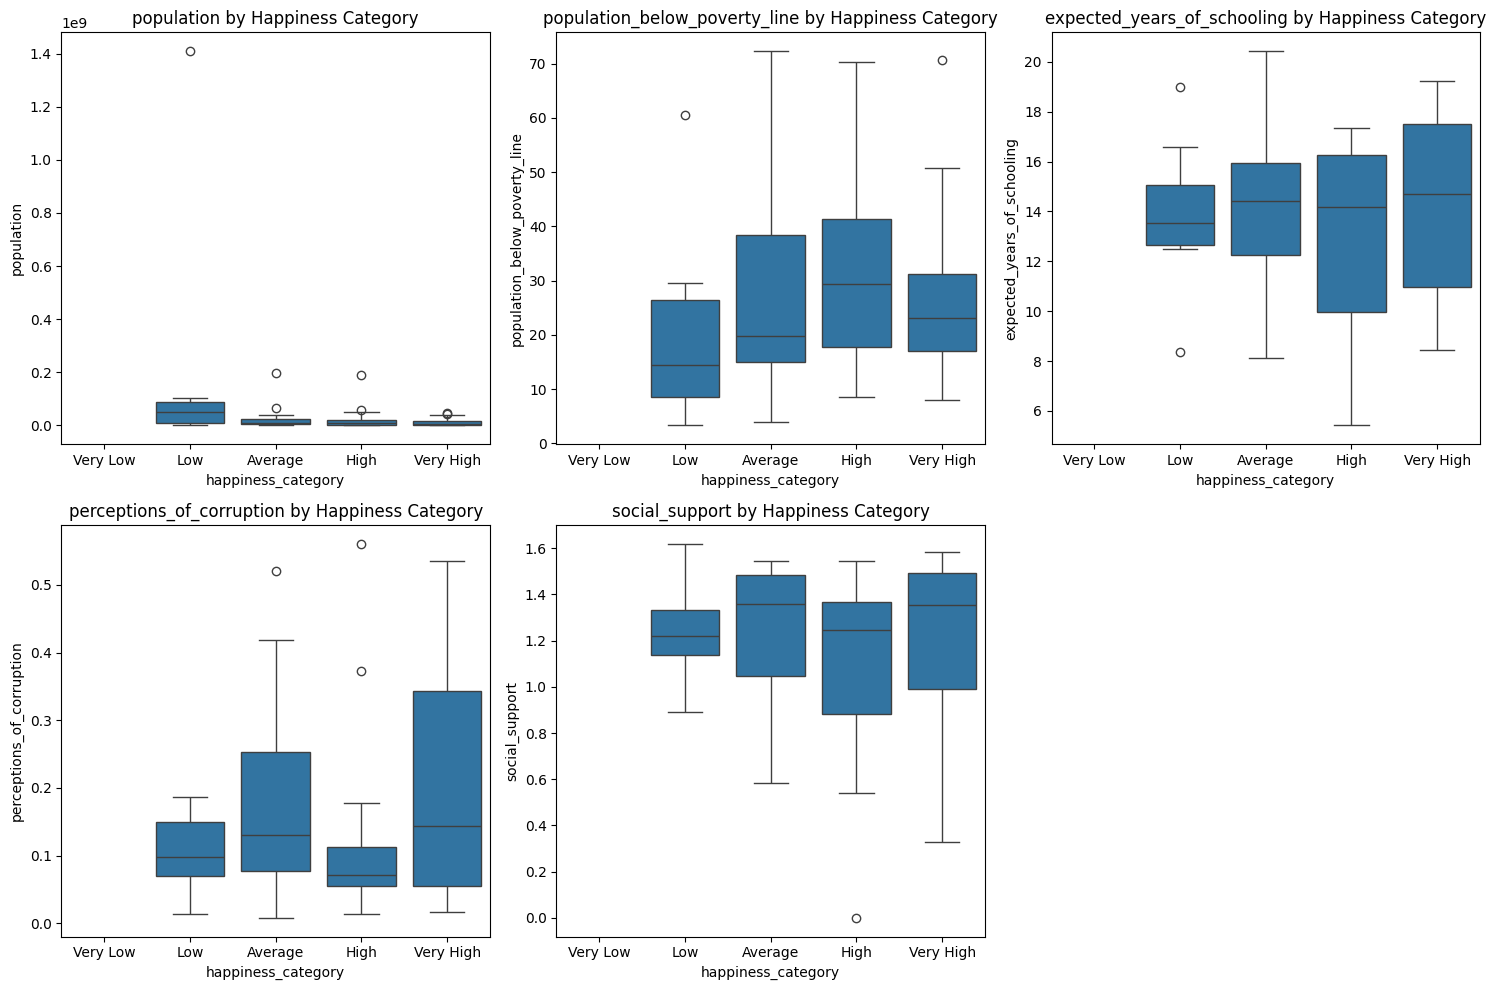

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='happiness_category', y=feature, data=plot_df)
    plt.title(f'{feature} by Happiness Category')
plt.tight_layout()
plt.show()

Population distribution is relatively similar across all happiness categories with a prominent outlier in the "Low" category. The population size might has minimal relationship with happiness measures.

Population below poverty line shows the "Low" category has the lowest median poverty rate, while "Average" and "High" categories show higher. The "Very High" median is lower than "Average" and "High", but it shows more variability.

Expected years of schooling has a increasing median with the increase of happiness level. However, the "Very High" category shows the widest interquartile range, which suggestest the big variability in education levels among the happiest countries.

Similar as we discussed before, the countries with vert high happiness value may also have similar perceptions of corruption.

Finally, social support shows the strongest positive association with happiness. The median value of social support also increase along with the happiness level.

Finally, we will draw the regression plot.

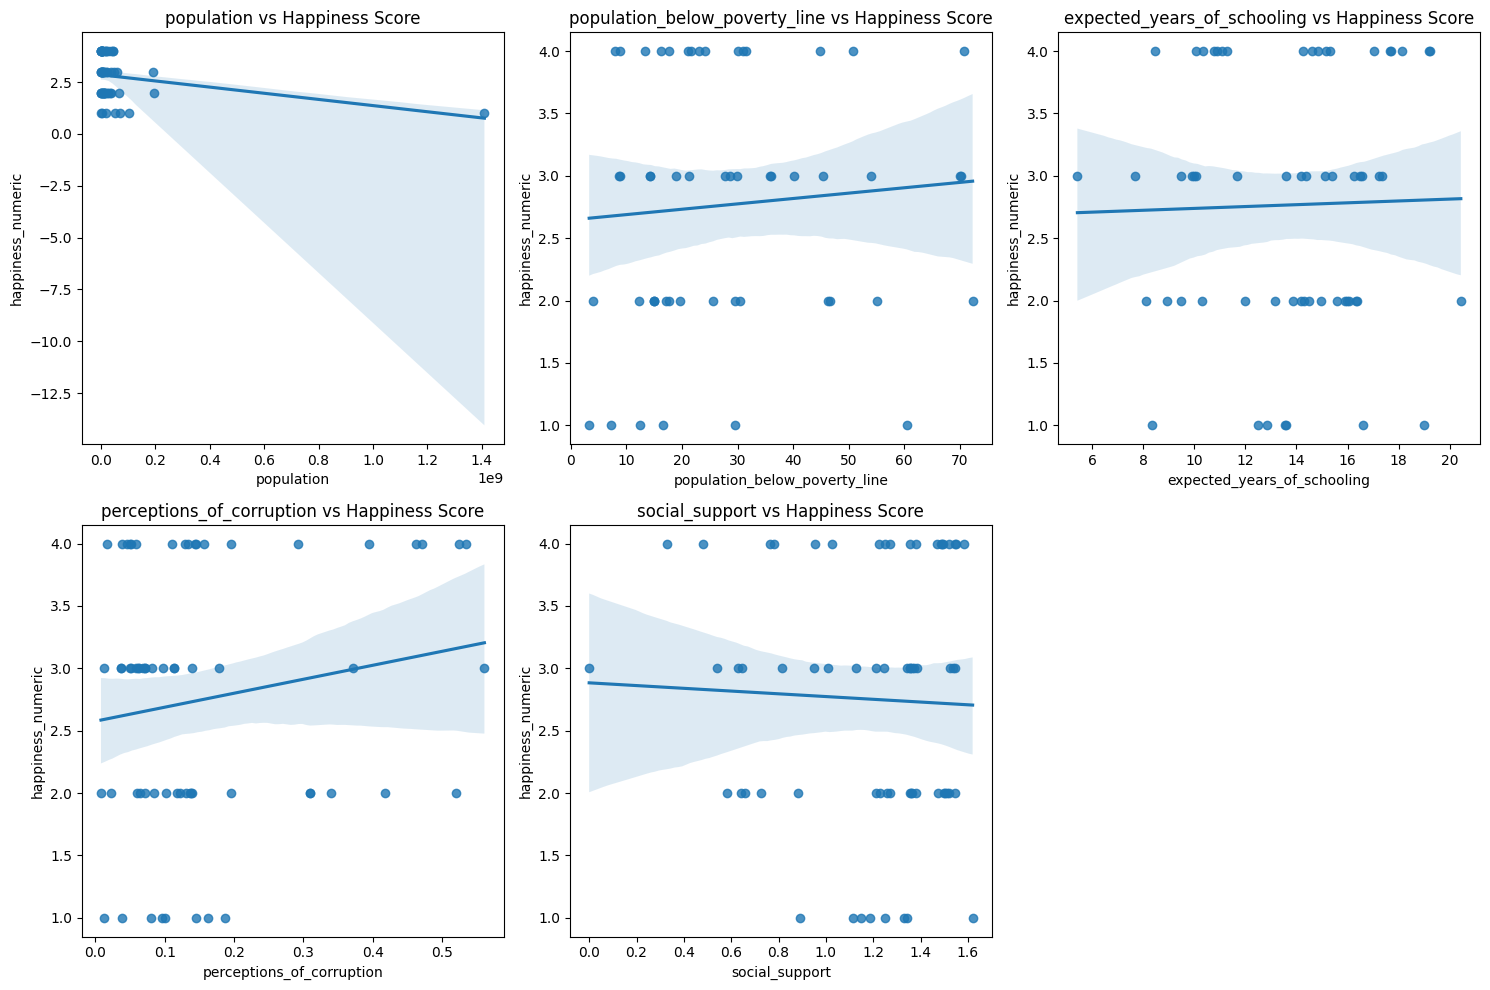

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=feature, y='happiness_numeric', data=plot_df)
    plt.title(f'{feature} vs Happiness Score')
plt.tight_layout()
plt.show()

Population shows a slightly negative relationship with happiness, suggesting that countries with larger populations tend to have lower happiness scores. However, the wide confidence interval (shaded area) expanding significantly as population increases, which indicates high uncertainty in this relationship.

Suprisingly, population below poverty line shows a weak positive relationship with happiness. This reflects some countries with more poverty might be happier.

Expected years of schooling shows a slightly positive relationship with happiness, but the effect appears modest because data points are scattered across all happiness levels regardless of education years.

Perceptions of corruption also has a positive relationshiop with happiness level.

Social support shows a slightly negative trend with happiness. But the relationship seems also weak since the data points are also scattered acorss.

Now we plan to detect the outliers.

First we will run a z-score test:

In [ ]:
from scipy.stats import zscore

z_scores = X_train[numerical].apply(zscore)

outliers_z = (z_scores.abs() > 3)

print(f"Outliers with Z-score method: {outliers_z.sum().sort_values(ascending=False).sum()}")
print(outliers_z.sum().sort_values(ascending=False))

Outliers with Z-score method: 5
gdp_per_capita                   1
social_support                   1
freedom_to_make_life_choices     1
generosity                       1
perceptions_of_corruption        1
healthy_life_expectancy          0
population                       0
population_below_poverty_line    0
hdi                              0
life_expectancy                  0
expected_years_of_schooling      0
mean_years_of_schooling          0
gni                              0
dtype: int64


Only 5 outliers in total are identified by the z-score method:
"gdp_per_capita": 1; "social_support": 1; "freedom_to_make_life_choices": 1;

*   gdp_per_capita: 1
*   social_support: 1
*   freedom_to_make_life_choices: 1
*   generosity: 1
*   perceptions_of_corruption: 1

This shows the dataset is well-distributed.


We will then use the IQR method:

In [ ]:
Q1 = X_train[numerical].quantile(0.25)
Q3 = X_train[numerical].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (X_train[numerical] < lower_bound) | (X_train[numerical] > upper_bound)

print(f"Outliers with IQR method:{outliers_iqr.sum().sort_values(ascending=False).sum()}")
print(outliers_iqr.sum().sort_values(ascending=False))

Outliers with IQR method:32
perceptions_of_corruption        10
population                        9
population_below_poverty_line     4
freedom_to_make_life_choices      3
social_support                    2
gni                               2
gdp_per_capita                    1
generosity                        1
healthy_life_expectancy           0
hdi                               0
life_expectancy                   0
expected_years_of_schooling       0
mean_years_of_schooling           0
dtype: int64


32 outliers in total are identified by the IQR method.

The outliers are super high in "perceptions_of_corruption" and "population", which have 10 and 9 outoiers.

The difference of outliers with different methods shows the dataset has more mild outliers instead of extreme ones.

We finally run the boxplots for outliers in variables across happiness categories:

The outliers in variables across happiness categories are shown in the plots below:


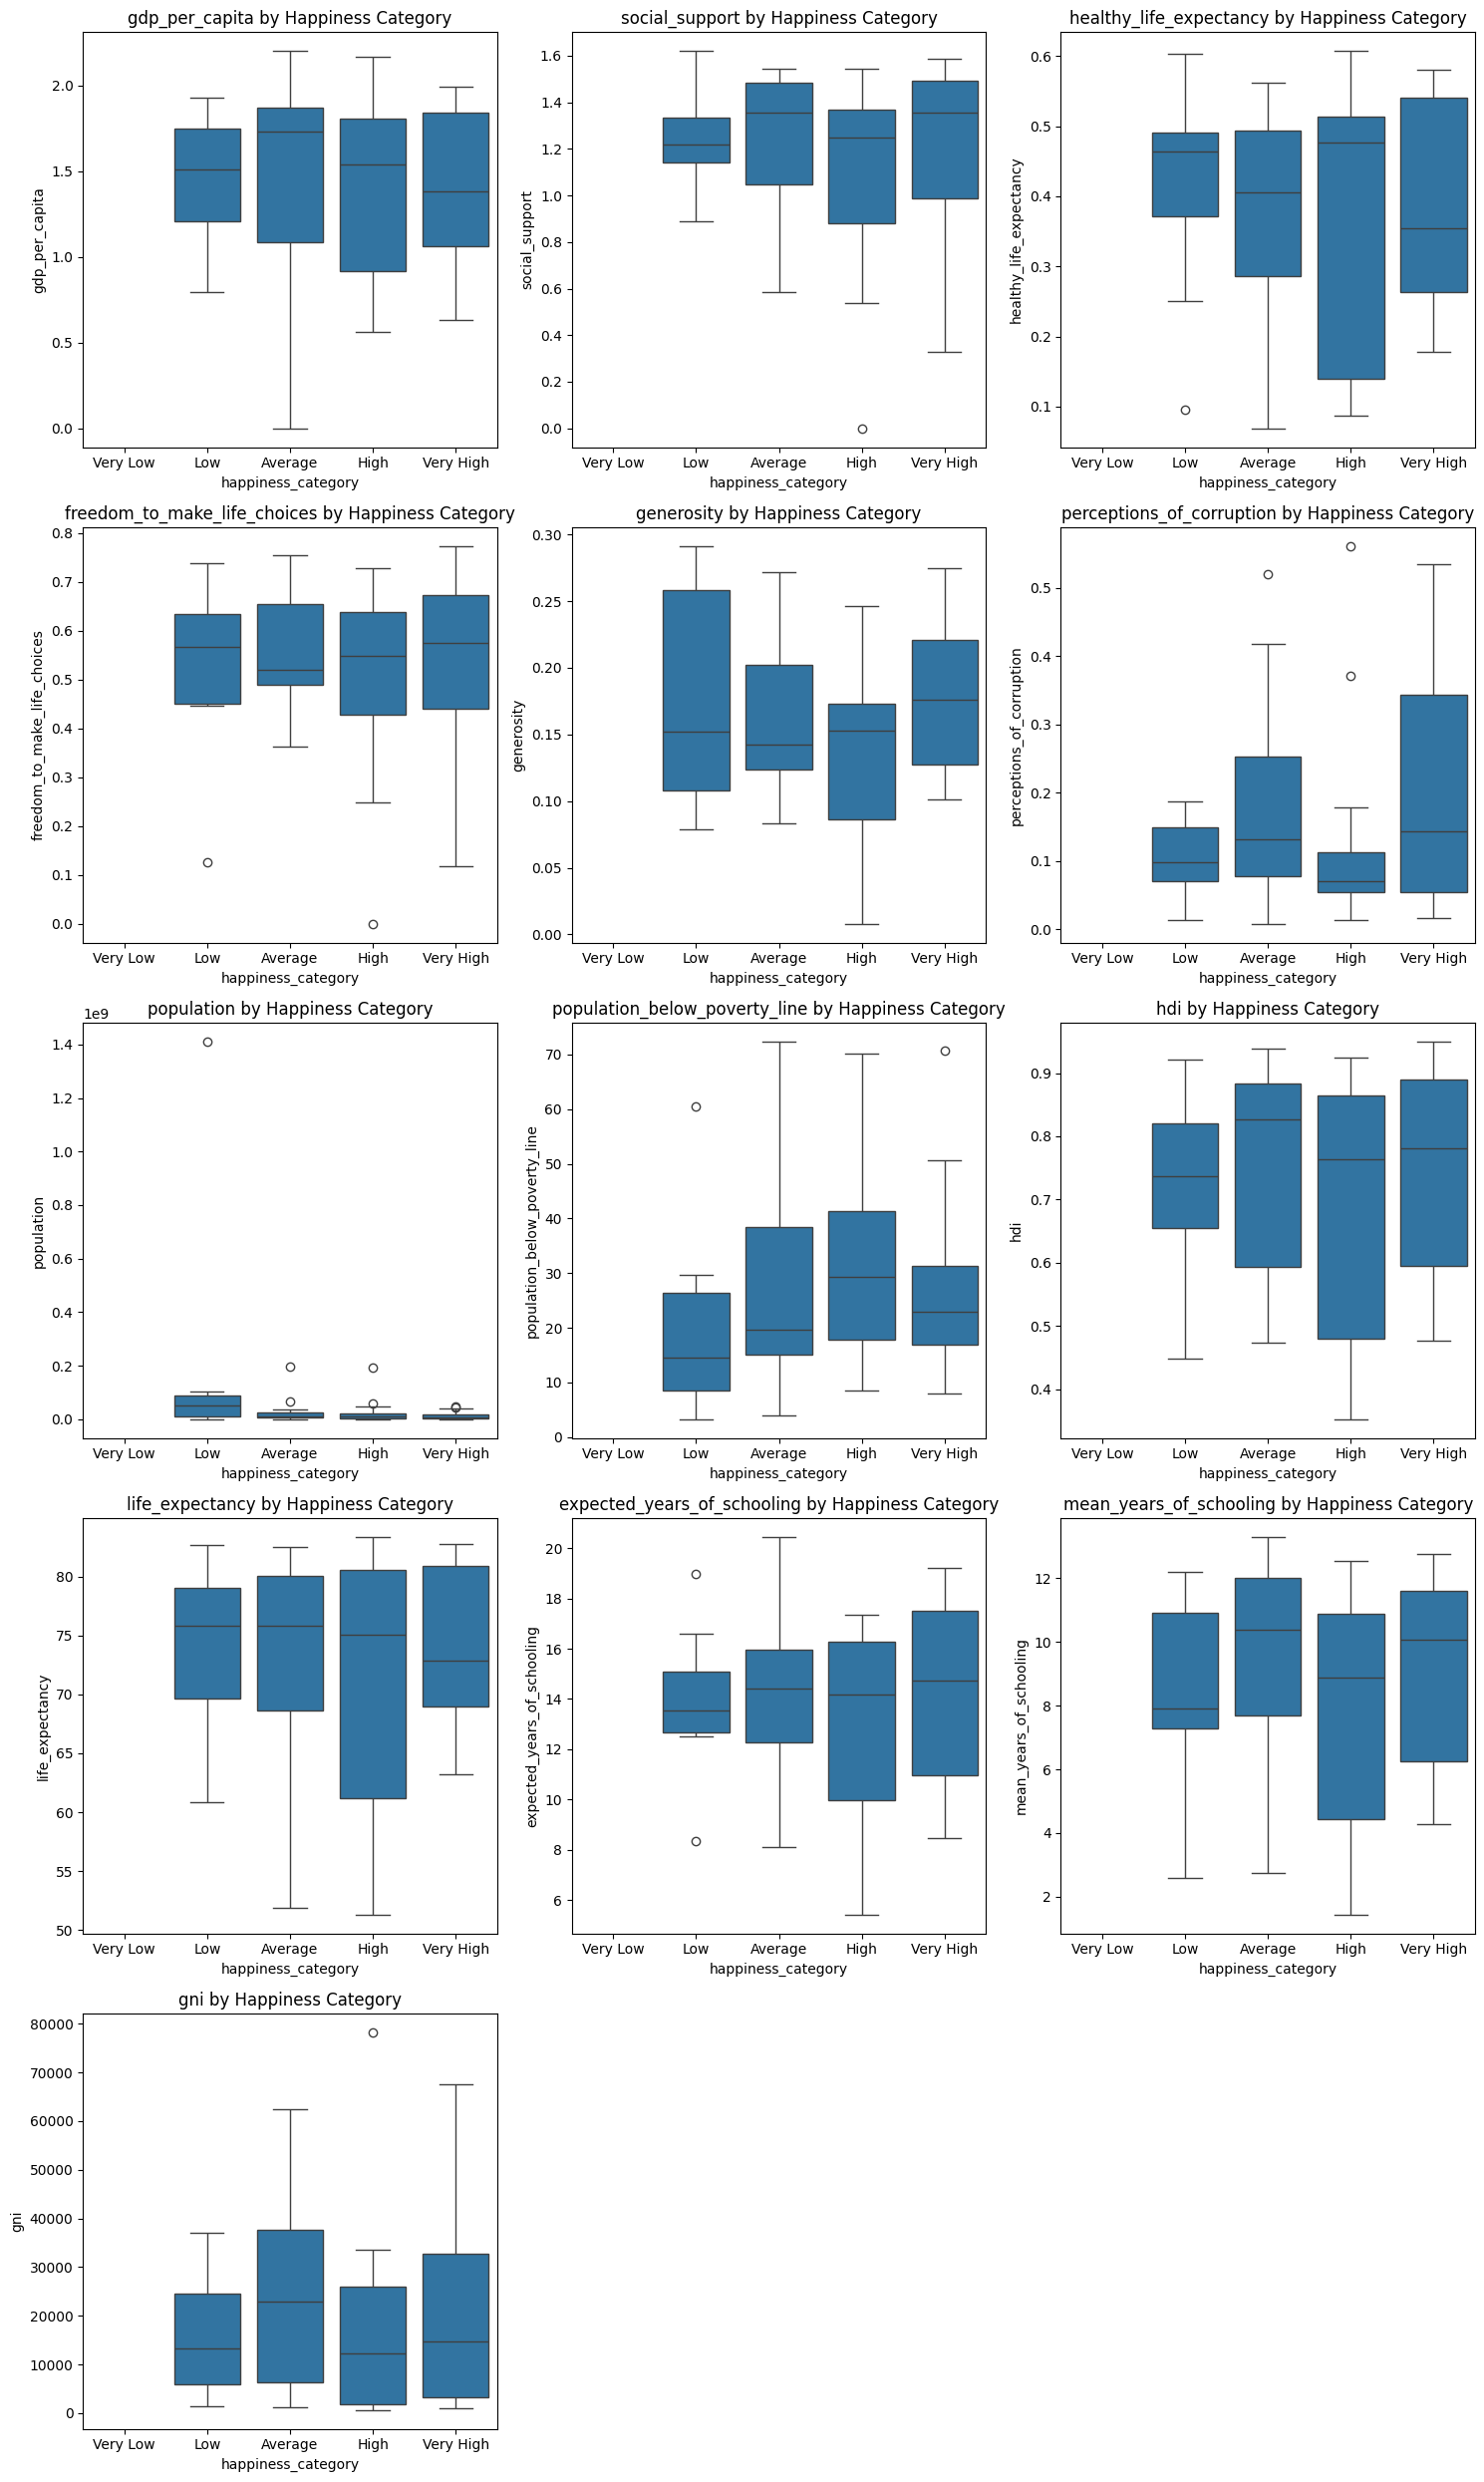

In [ ]:
print("The outliers in variables across happiness categories are shown in the plots below:")

plot_df2 = X_train[numerical].copy()
plot_df2['happiness_category'] = y_train


all_features = X_train[numerical].columns.tolist()

rows, cols = 5, 3
plt.figure(figsize=(15, rows * 5))

for i, feature in enumerate(all_features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x='happiness_category', y=feature, data=plot_df2)
    plt.title(f'{feature} by Happiness Category')
plt.tight_layout()
plt.show()

From the box plots we can see variables like "population", "gni", and "population_below_poverty_line" exhibit extreme values across different happiness categories.

We should apply logarithmic transformations to variables have extreme values like "population" and "gni".

For extremely high outliers, maybe we can use robust scaling techniques.

## 2. Feature Engineering

We want to apply log transformations to normalize skewed data and improve model stability.

The first step we did here is to look at all the distribution of the data

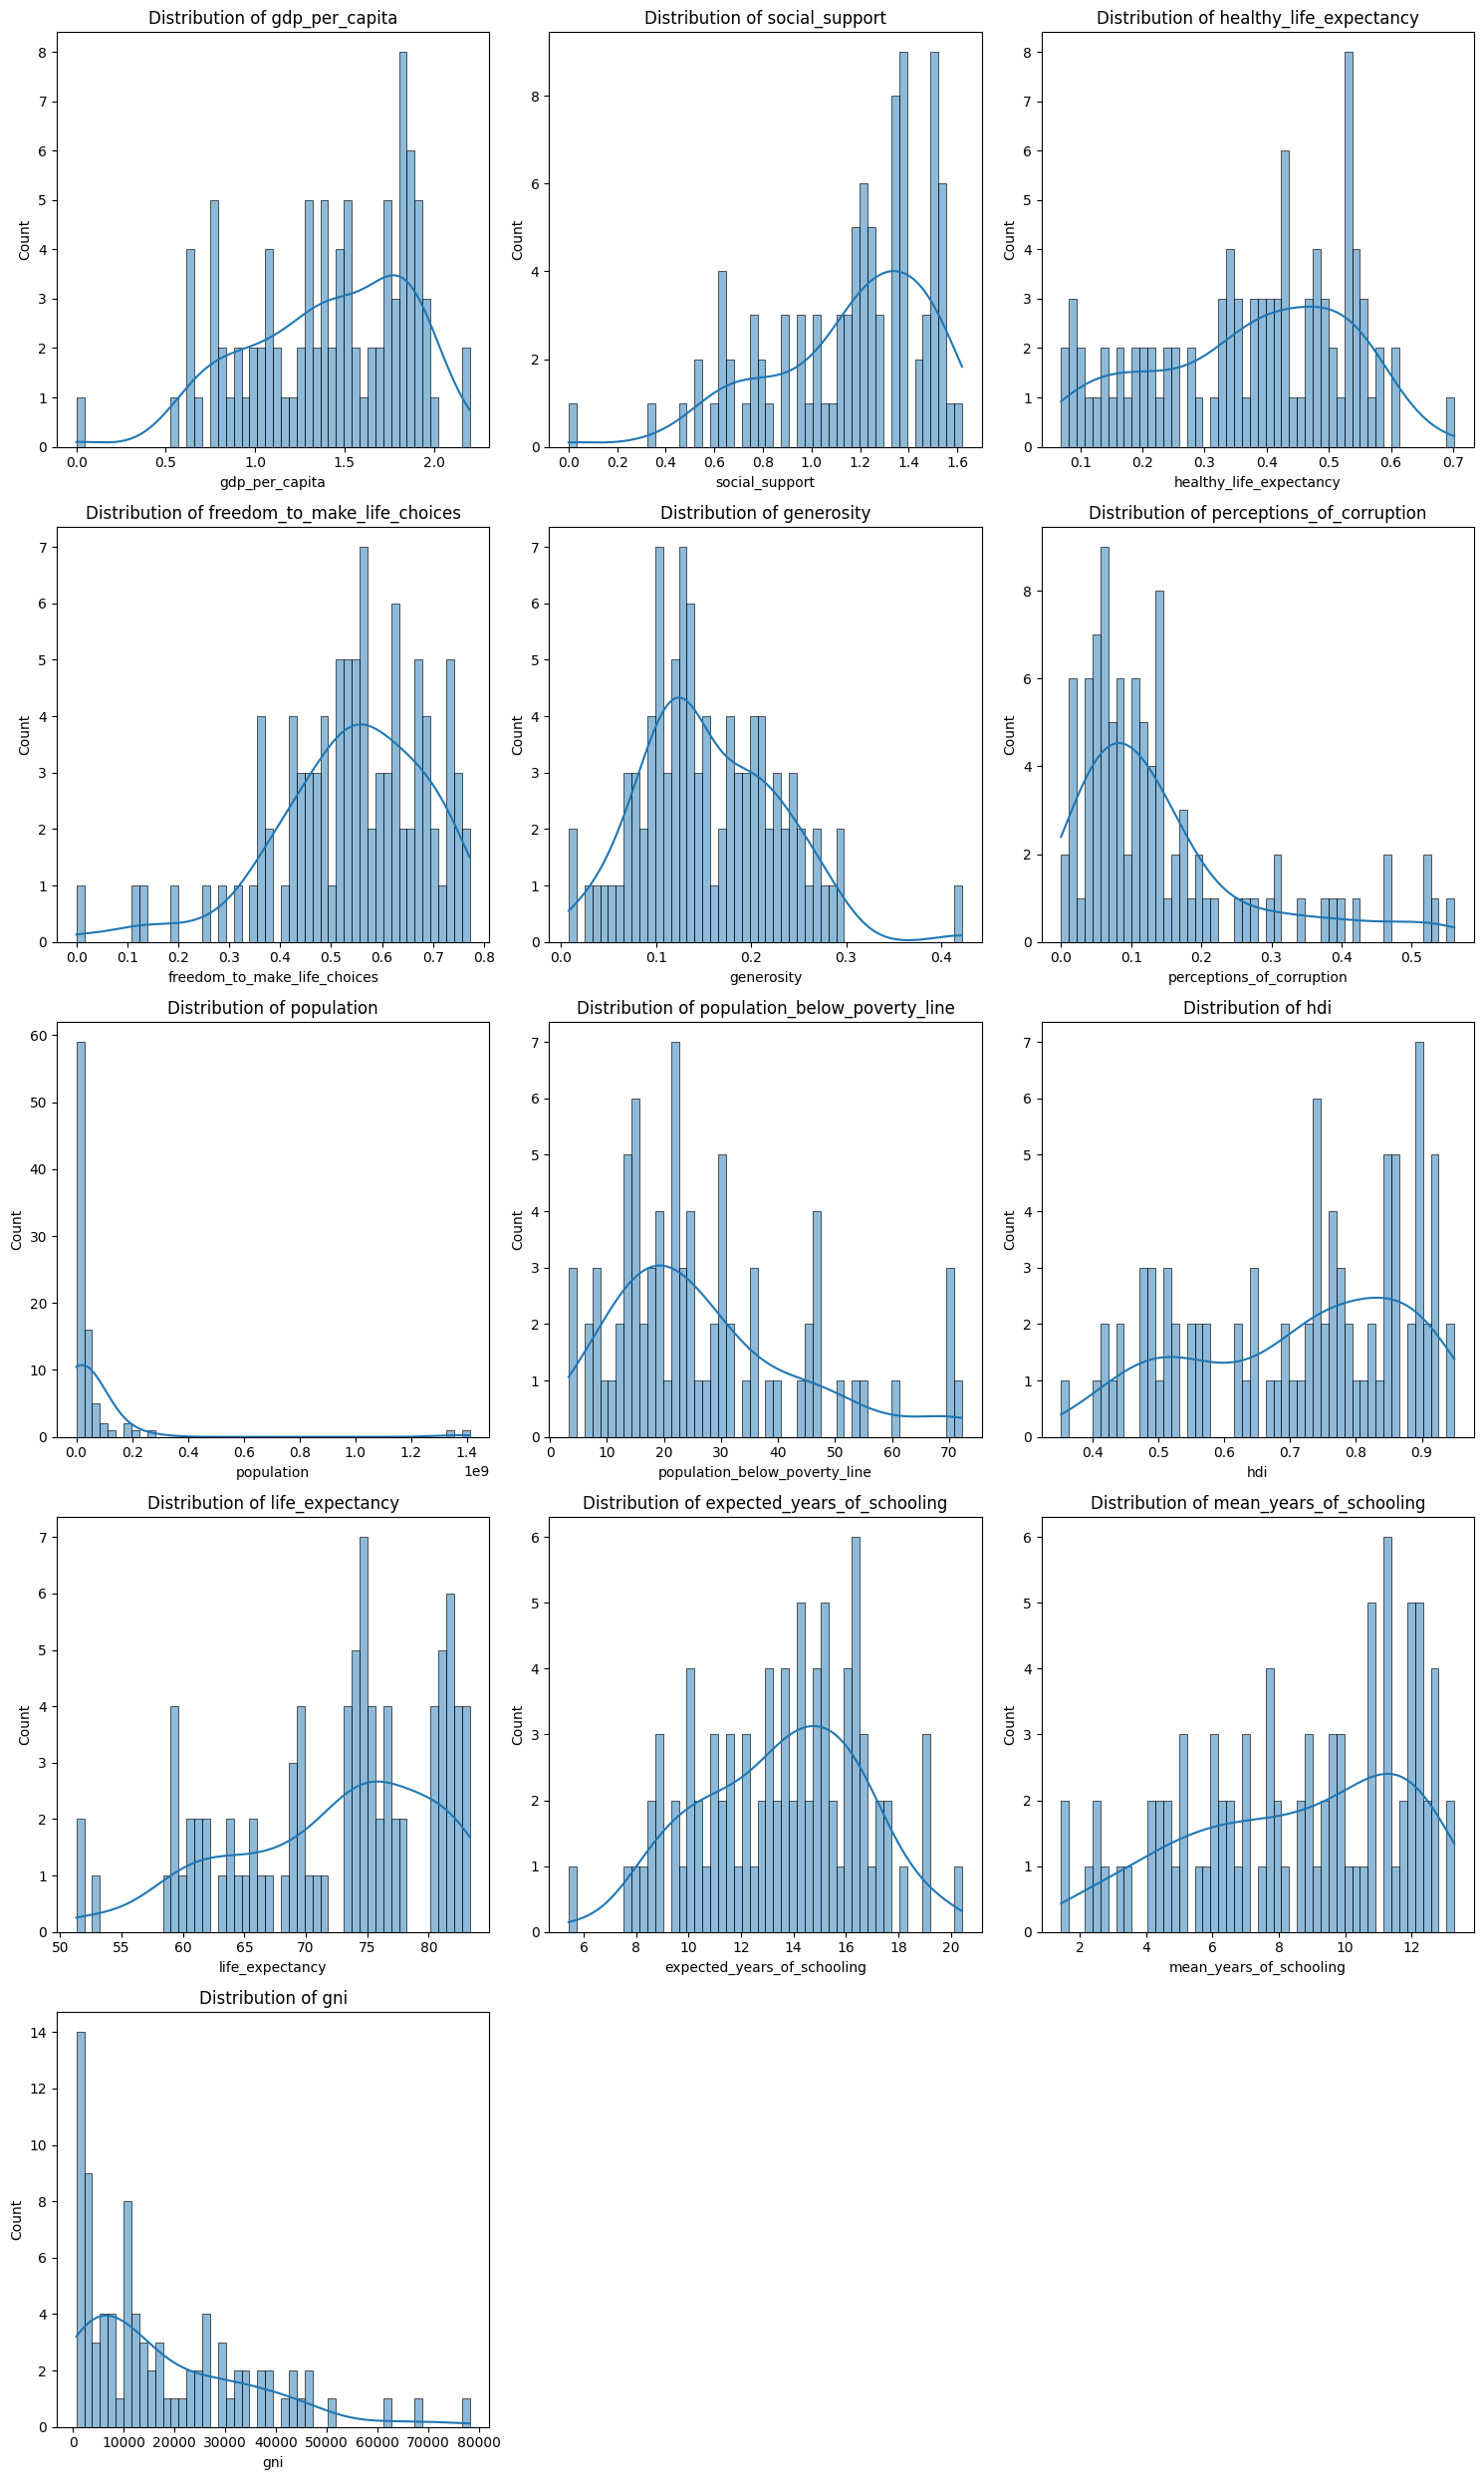

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

rows, cols = 5, 3
plt.figure(figsize=(15, rows * 5))

for i, feature in enumerate(all_features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(X_train[feature], bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

From the graphs above we can see, the skewd variable distribution include:


*   gdp_per_capita
*   social_support
*   perceptions_of_corruption
*   population
*   population_below_poverty_line
*   gni

We then transform these variabls into the log form







In [ ]:
import numpy as np

log_features = ["gdp_per_capita", "social_support", "perceptions_of_corruption", "population", "population_below_poverty_line", "gni"]

for feature in log_features:
    X_train[f"log_{feature}"] = np.log1p(X_train[feature])

for feature in log_features:
    X_test[f"log_{feature}"] = np.log1p(X_test[feature])

The training and testing data variables after transforming are shown below:

In [ ]:
X_train.head()

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,...,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,log_gdp_per_capita,log_social_support,log_perceptions_of_corruption,log_population,log_population_below_poverty_line,log_gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,...,65.515,10.34614,6.145955,1319.699397,0.489806,0.576051,0.125751,17.056965,4.272491,7.185917
1,Mauritania,Sub-Saharan Africa,1.099,0.764,0.244,0.320,0.130,0.195,4420184.0,31.0,...,63.239,8.46379,4.266000,3527.264154,0.741461,0.567584,0.178146,15.301692,3.465736,8.168561
2,Mongolia,East Asia,1.379,1.494,0.244,0.425,0.239,0.058,3075647.0,21.6,...,69.806,14.84552,9.750000,10449.207270,0.866680,0.913888,0.056380,14.939026,3.117950,9.254377
3,Tajikistan,Commonwealth of Independent States,0.972,1.248,0.291,0.599,0.104,0.292,8921343.0,31.5,...,69.582,11.26186,10.355820,2600.585607,0.679048,0.810041,0.256191,16.003957,3.481240,7.863876
4,Ukraine,Central and Eastern Europe,1.358,1.354,0.355,0.551,0.265,0.016,44222947.0,24.1,...,71.129,15.30672,11.340000,7361.011228,0.857814,0.856116,0.015873,17.604754,3.222868,8.904088


In [ ]:
X_test.head()

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,...,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,log_gdp_per_capita,log_social_support,log_perceptions_of_corruption,log_population,log_population_below_poverty_line,log_gni
0,Kazakhstan,Commonwealth of Independent States,1.664,1.491,0.389,0.628,0.136,0.149,18204499.0,2.7,...,69.588,14.971890,11.676000,22093.086510,0.979829,0.912684,0.138892,16.717179,1.308333,10.003065
1,Panama,Latin America and Caribbean,1.714,1.402,0.475,0.630,0.065,0.036,4098587.0,23.0,...,77.755,13.038995,9.854000,19470.202500,0.998424,0.876302,0.035367,15.226153,3.178054,9.876692
2,Bangladesh,South Asia,1.133,0.513,0.355,0.617,0.139,0.165,164669751.0,31.5,...,71.985,10.178706,5.241577,3341.490722,0.757529,0.414094,0.152721,18.919453,3.481240,8.114472
3,Mozambique,Sub-Saharan Africa,0.570,0.885,0.000,0.625,0.161,0.192,29668834.0,46.1,...,55.478,9.068830,3.499116,1098.435768,0.451076,0.633928,0.175633,17.205608,3.852273,7.002552
4,Philippines,Southeast Asia,1.238,1.108,0.286,0.714,0.104,0.141,104918090.0,21.6,...,68.340,11.733020,9.326870,8395.094758,0.805583,0.745740,0.131905,18.468691,3.117950,9.035522


Based on previous visualiztions, here we interact some variables:


*   log_gdp_per_capita * log_social_support

    GDP per capita represents a country’s economic prosperity, while social support reflects the strength of community networks. Economic prosperity and social support likely have a synergistic effect on happiness

*   healthy_life_expectancy * freedom_to_make_life_choices

    When people have the freedom in life, living a long life can increase the happiness.


*   log_perceptions_of_corruption * log_social_support

    Strong social support systems might help people navigate corrupt environments, which might expian the counterintuitive finding before that some countries maintain high happiness despite corruption.



In [ ]:
X_train['gdp_social_interaction'] = X_train['log_gdp_per_capita'] * X_train['log_social_support']
X_train['health_freedom_interaction'] = X_train['healthy_life_expectancy'] * X_train['freedom_to_make_life_choices']
X_train['corruption_support_interaction'] = X_train['log_perceptions_of_corruption'] * X_train['log_social_support']

X_test['gdp_social_interaction'] = X_test['log_gdp_per_capita'] * X_test['log_social_support']
X_test['health_freedom_interaction'] = X_test['healthy_life_expectancy'] * X_test['freedom_to_make_life_choices']
X_test['corruption_support_interaction'] = X_test['log_perceptions_of_corruption'] * X_test['log_social_support']

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numeric_features = X_train.select_dtypes(include=['int64', 'float64'])
numeric_features = numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['country', 'region']

categorical_transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

preprocess=preprocessor.fit(X_train)

To create the preprocessor and fit the model,, we firstly identify and extract all the numerical variables in X_train dataset, which are beloinging to int64 and float64 data type.

This step is becuase we need to create the numeric transformer and categorical tranformer sepretely.

We then define the transfomation pipeline for numerical features.

For the inputation, we replace the missing values of each column with the median value of each column.

For the scaling, we standardizes the numerical features to have a mean of 0 and a variance of 1, which helps prevent features with larger scales from dominating the model.

The two steps are crucial because they ensure all the numerical features are properly normalized and have no missing values before model training.

For the SimpleImputer in "numeric_transformer", we use 'median' because we have continuous variables like GDP, which 0 would be a meaningful value that could potentially distort the analysis and make the data artificially skewed.

We repeat the similar process for the categorical variables. First select and define the categorical features, which are "country" and "region".

We then create the transfomation pipeline for categorical features.

The inputation strategy change to "most frequent", ensuring all missing values are replaced with the most common category in each feature.

The OneHotEncoder will transform categorical variables into binary vectors, allowing machine learning models to interpret them numerically.

The two steps are because we need to preprocess the categorical data to ensure our machine learning algorithms can understand.

Finally, we combined the numeric transformer and the categorical transformer to construct the final combined pipeline and named as preprocessor.

We finally use the trained data to fit the preprocessor, which enables it to learn the necessary statistics,and thus eventually utilize and transform both training and test data consistently.

We then transform the data with preprocessor:

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

We check shape of X data after preprocessing it using our new function:

In [ ]:
preprocessor(X_train).shape

(95, 124)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df1 = pd.read_csv('WHR_2023.csv')
df2 = pd.read_csv("newcountryvars.csv")

# We want to rename 'country_name' in df2 to match 'country' in df1
df2.rename(columns={'country_name': 'country'}, inplace=True)

# We want to merge datasets on 'country'
df = df1.merge(df2, on='country', how='inner')

# We want to check if 'region' exists, else remove it
if 'region' not in df.columns:
    categorical_features = ['country']
else:
    categorical_features = ['country', 'region']

df = df.dropna(subset=['happiness_score'])
df['happiness_category'] = pd.qcut(df['happiness_score'], q=3, labels=[0, 1, 2])
y = df['happiness_category']

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('happiness_score')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

X = df[numeric_features + categorical_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

model = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42)
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.7692307692307693


After running this model, we can find that the accuracy of this model is 0.78, which indicates that the model we made here is of high accuracy.

## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate predicted values (Model 1)
prediction_labels = model.predict(X_test_preprocessed)

accuracy = accuracy_score(y_test, prediction_labels)
class_report = classification_report(y_test, prediction_labels)
conf_matrix = confusion_matrix(y_test, prediction_labels)

print("Model 1 Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)


Model 1 Accuracy: 0.7692307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.60      0.75      0.67         8
           2       1.00      0.60      0.75        10

    accuracy                           0.77        26
   macro avg       0.80      0.78      0.77        26
weighted avg       0.82      0.77      0.77        26


Confusion Matrix:
 [[8 0 0]
 [2 6 0]
 [0 4 6]]


Class 0: Low happiness; Class 1: Medium happiness; Class 2: High happiness.

We can find that class 0 has a very strong performance.

From the confusion matrix, we can also get that all 8 Class 0 samples were correctly classified, which also indicates perfect recall.

2 class 1 samples are misclassified as Class 0, and 6 class 1 samples are correctly classified.

4 class 2 samples are misclassified as Class 1, and 6 class 2 samples are correctly classified.

## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# We want to keep all transformed features here
X_train_final = X_train_preprocessed
X_test_final = X_test_preprocessed

model_2 = RandomForestClassifier(
    n_estimators=400,
    max_depth=14,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.8,
    class_weight='balanced_subsample',
    random_state=42
)

model_2.fit(X_train_final, y_train)
y_pred_2 = model_2.predict(X_test_final)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print(f"Final Improved Model Accuracy: {accuracy_2:.4f}")


Final Improved Model Accuracy: 0.8077


For the changes, first, the number of trees (n_estimators) was increased from 50 to 400, which made the model more stable by reducing variance and ensuring more consistent predictions. Also, max_depth was adjusted from 10 to 14, which allowes trees to capture more complex relationships without overfitting. Class_weight was changed from balanced to balanced_subsample, which can ensure that underrepresented happiness categories were given equal importance in every tree. The feature selection strategy was also modified by setting max_features=0.8, which can reduce overfitting. We also increase min_samples_split from 2 to 5 to prevent excessive splitting and set min_samples_leaf=2 to ensure each leaf node contained at least two samples.

The combination of increased stability, better feature utilization, and reduced overfitting allowed the model to capture patterns in the data more effectively. The changes ensured that the model generalized well to unseen data, which can lead to a significant performance gain.

In [ ]:
# Evaluate Model 2:
# Generate predicted y values (Model 2)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can use full preprocessed test data here
X_test_final = X_test_preprocessed

prediction_labels = model_2.predict(X_test_final)
accuracy = accuracy_score(y_test, prediction_labels)

print(f"Model 2 Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))


Model 2 Accuracy: 0.8077

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.64      0.88      0.74         8
           2       1.00      0.60      0.75        10

    accuracy                           0.81        26
   macro avg       0.84      0.83      0.81        26
weighted avg       0.85      0.81      0.80        26


Confusion Matrix:
[[8 0 0]
 [1 7 0]
 [0 4 6]]


We think it is worth making more changes to the parameters. But right now it is inefficient to keep trying random values manually.

A better alternative is using hyperparameter tuning techniques like GridSearchCV or RandomizedSearchCV, which systematically explore different parameter combinations.

In [ ]:
# A third model using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': np.arange(100, 401, 100),
    'max_depth': np.arange(10, 21, 5),
    'min_samples_split': np.arange(2, 11, 4),
    'min_samples_leaf': np.arange(1, 5, 2),
    'max_features': ['sqrt', 'log2']
}

gridmodel = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

gridmodel.fit(X_train_preprocessed, y_train)
print("Best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("Best parameters: {}".format(gridmodel.best_params_))


Best mean cross-validation score: 0.815
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


We can find that the accuracy of model 3 is 0.815, which is higher than the accuracy of previous models (model 1 and model 2). This finding also verifies what we thought before. Hyperparameter tuning (GridSearchCV) right now is more efficient than keep trying random values.

In [ ]:
# Generate predicted values
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

prediction_labels = gridmodel.best_estimator_.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, prediction_labels)

print(f"Model 3 Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))


Model 3 Accuracy: 0.7692

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.62      0.62      0.62         8
           2       0.88      0.70      0.78        10

    accuracy                           0.77        26
   macro avg       0.77      0.78      0.76        26
weighted avg       0.77      0.77      0.76        26


Confusion Matrix:
[[8 0 0]
 [2 5 1]
 [0 3 7]]


We can find that the accuracy here is 0.7692, which is slightly lower than the best cross-validation score found during GridSearchCV (0.815). However, this is expected because cross-validation evaluates multiple splits of training data, while the test set is a single unseen dataset.

In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# We choose the GradientBoostingClassifier model
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_preprocessed, y_train)
prediction_labels = model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, prediction_labels)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))


Model Accuracy: 0.7308

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.56      0.62      0.59         8
           2       0.78      0.70      0.74        10

    accuracy                           0.73        26
   macro avg       0.74      0.73      0.73        26
weighted avg       0.74      0.73      0.73        26


Confusion Matrix:
[[7 1 0]
 [1 5 2]
 [0 3 7]]


The GradientBoostingClassifier we selected was trained with 200 estimators, a learning rate of 0.1, and a maximum tree depth of 5 to balance performance and prevent overfitting. The model achieved 73.08% accuracy, performing well for Class 0 (88% precision) but not well with Class 1 (56% precision), which may lead to some misclassifications. The learning rate of 0.1 allowed gradual learning, while max_depth=5 ensured trees were deep enough to capture patterns without overfitting.

We think this accuracy is not as strong as expected from boosting modele, which may due to insufficient samples in certain classes. However, Class 1 misclassifications may indicate some overlaps, which can be improved by feature selection to remove less useful features.

For further improvements, we can try to increase n_estimators, and adjust learning_rate for preventing overfitting.

## 7. Basic Deep Learning

In [ ]:
# Import necessary libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# feature count after preprocessing
feature_count = preprocessor.transform(X_train).shape[1]

# y_train is one-hot encoded
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)

# Step 3: Define Neural Network Model with 5 layers
keras_model = Sequential([
    Dense(128, activation='relu', input_shape=(feature_count,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Step 4: Compile the model
keras_model.compile(loss='categorical_crossentropy',
                    optimizer='sgd',
                    metrics=['accuracy'])

# Step 5: Fit the Neural Network to the Training Set
keras_model.fit(preprocessor.transform(X_train), y_train,
                batch_size=20,
                epochs=300,
                validation_split=0.25)

Epoch 1/300
2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.4625 - loss: 1.0672

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4625 - loss: 1.0683 - val_accuracy: 0.3846 - val_loss: 1.0597
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5045 - loss: 1.0576 - val_accuracy: 0.3846 - val_loss: 1.0512
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4297 - loss: 1.0538 - val_accuracy: 0.4615 - val_loss: 1.0430
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4622 - loss: 1.0482 - val_accuracy: 0.5000 - val_loss: 1.0348
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5357 - loss: 1.0313 - val_accuracy: 0.5000 - val_loss: 1.0263
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5832 - loss: 1.0185 - val_accuracy: 0.5385 - val_loss: 1.0174
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6543 - loss: 1.0036 - val_accuracy: 0.5769 - val_loss: 1.0082
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7182 - loss: 1.0019 - val_accuracy: 0.5769 - val_loss: 0.9984
Epoch 9/300

The activation function We used for the middle layers is ReLU, which helps the model learn complex patterns. The reason for using Softmax in the last layer is that the model’s loss function is compiled with ‘categorical_crossentropy,’ and Softmax is the best choice for multi-class classification.Training for 300 epochs led to overfitting, as training accuracy reached 100% while validation accuracy plateaued. More training is unnecessary; early stopping and regularization would improve generalization.Categorical_crossentropy is used because the task is multi-class classification. sgd (Stochastic Gradient Descent) is simple but may converge slowly. Switching to adam could improve convergence speed and performance without tuning the learning rate manually.

Can you try getting the model's training history out and plotting the curves?

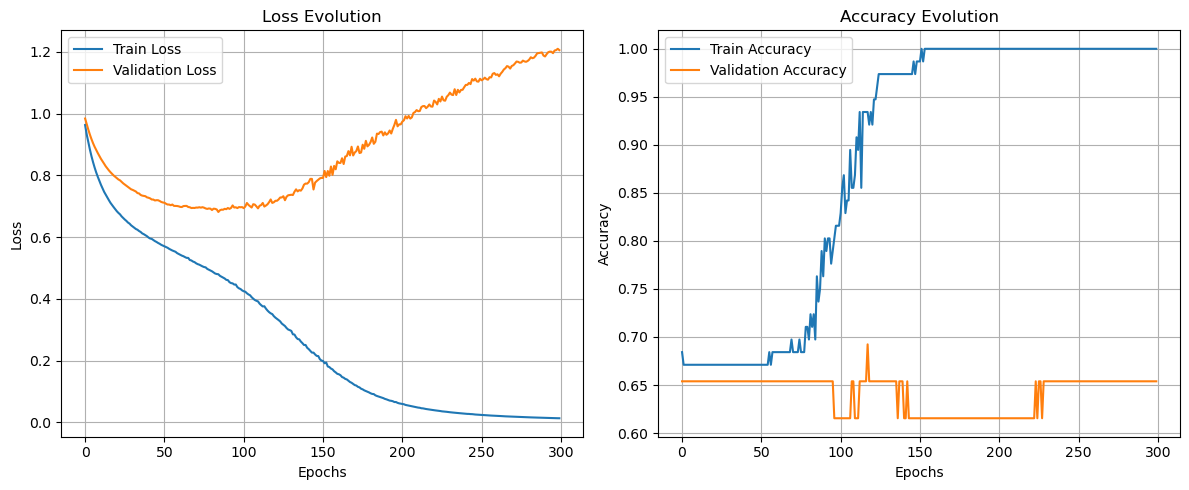

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Left Graph: Loss Evolution
	•	The training loss (blue line) decreases steadily, approaching near zero, indicating that the model is learning well on the training data.
	•	The validation loss (orange line) initially decreases but starts increasing after a certain point, suggesting overfitting. This means the model is memorizing training data rather than generalizing well to unseen data.

Right Graph: Accuracy Evolution
	•	The training accuracy (blue line) increases rapidly, reaching nearly 100%, which is a sign of overfitting.
	•	The validation accuracy (orange line) remains relatively flat around 65%, with fluctuations. This suggests the model is not improving significantly on unseen data, further confirming overfitting.

In [ ]:
#-- Generate predicted y values

prediction_column_index = np.argmax(keras_model.predict(preprocessor.transform(X_test)), axis=1)  # Predict

# Extract correct prediction labels
class_labels = list(range(num_classes))
prediction_labels = [class_labels[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels
if len(y_test.shape) > 1:
    true_labels = np.argmax(y_test, axis=1)
else:
    true_labels = y_test

# Print model accuracy and classification report
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(true_labels, prediction_labels))
print("\nClassification Report:\n", classification_report(true_labels, prediction_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy: 0.8076923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.67      0.75      0.71         8
           2       1.00      0.70      0.82        10

    accuracy                           0.81        26
   macro avg       0.82      0.82      0.81        26
weighted avg       0.84      0.81      0.81        26



This output shows the model’s classification performance. The accuracy is 80.77%, with precision, recall, and F1-scores detailed for each class. Class 0 has perfect recall, while class 2 has perfect precision. The macro and weighted averages suggest balanced performance, though class 1 performs slightly worse.

Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
import numpy as np
# Determine feature count after preprocessing
feature_count = preprocessor.transform(X_train).shape[1]

# Ensure y_train and y_test are one-hot encoded
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()
num_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))

# One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

keras_model_regularized = Sequential([
    Dense(128, input_shape=(feature_count,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

keras_model_regularized.compile(loss='categorical_crossentropy',
                                optimizer='adam',
                                metrics=['accuracy'])

history_regularized = keras_model_regularized.fit(
    preprocessor.transform(X_train), y_train,
    batch_size=20,
    epochs=300,
    validation_split=0.25
)

Epoch 1/300


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5954 - loss: 0.7188 - val_accuracy: 0.4615 - val_loss: 0.7007
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5172 - loss: 0.8430 - val_accuracy: 0.5385 - val_loss: 0.6930
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4586 - loss: 1.0392 - val_accuracy: 0.5769 - val_loss: 0.6879
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5752 - loss: 0.7806 - val_accuracy: 0.6538 - val_loss: 0.6836
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5230 - loss: 0.8642 - val_accuracy: 0.6154 - val_loss: 0.6804
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5394 - loss: 0.6970 - val_accuracy: 0.6538 - val_loss: 0.6750
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6801 - loss: 0.6880 - val_accuracy: 0.6538 - val_loss: 0.6696
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6363 - loss: 0.6165 - val_accuracy: 0.6538 - val_loss: 0.6645
Epoch 9/300

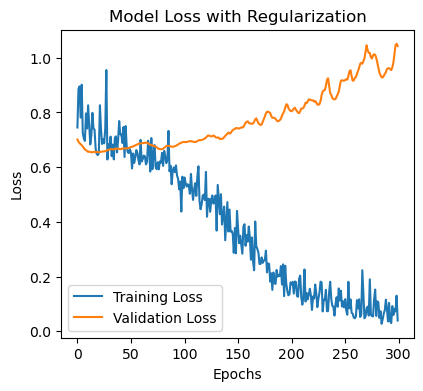

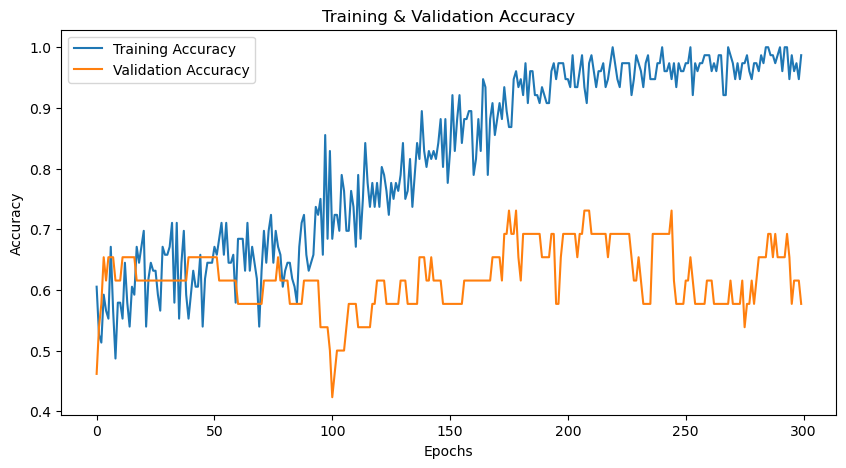

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_regularized.history['loss'], label='Training Loss')
plt.plot(history_regularized.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.figure(figsize=(10,5))
plt.plot(history_regularized.history['accuracy'], label='Training Accuracy')
plt.plot(history_regularized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

The training loss decreases while validation loss remains more stable, suggesting reduced overfitting. Training accuracy improves significantly, but validation accuracy, though fluctuating, shows an overall upward trend. Regularization helps control overfitting, but further tuning may be needed to enhance validation performance and model generalization.

The use of Dropout and Batch Normalization has reduced overfitting, as seen from the closer gap between training and validation accuracy. Though validation accuracy shows fluctuations, regularization has generally stabilized performance and improved model generalization despite slightly reduced peak accuracy on validation data.

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Activation

# LeakyReLU Activation Function Model
leaky_relu_model = Sequential([
    Dense(128, input_shape=(feature_count,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.5),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

leaky_relu_model.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])

history_leaky = leaky_relu_model.fit(preprocessor.transform(X_train), y_train,
                          batch_size=20,
                          epochs=300,
                          validation_split=0.25)


Epoch 1/300


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6016 - loss: 0.9470 - val_accuracy: 0.6154 - val_loss: 0.6681
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5261 - loss: 0.8530 - val_accuracy: 0.6538 - val_loss: 0.6740
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5508 - loss: 0.8916 - val_accuracy: 0.5769 - val_loss: 0.6765
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5219 - loss: 0.8149 - val_accuracy: 0.5000 - val_loss: 0.6767
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5396 - loss: 0.9502 - val_accuracy: 0.6154 - val_loss: 0.6764
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5144 - loss: 0.8627 - val_accuracy: 0.6154 - val_loss: 0.6751
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6498 - loss: 0.6875 - val_accuracy: 0.6154 - val_loss: 0.6760
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5732 - loss: 0.8612 - val_accuracy: 0.5769 - val_loss: 0.6760
Epoch 9/300

In [ ]:
# Tanh Activation Function Model
tanh_model = Sequential([
    Dense(128, input_shape=(feature_count,)),
    BatchNormalization(),
    Activation('tanh'),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation('tanh'),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation('tanh'),
    Dropout(0.5),

    Dense(32),
    BatchNormalization(),
    Activation('tanh'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

# Compile Tanh model
tanh_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# Fit the Tanh model
tanh_history = tanh_model.fit(preprocessor.transform(X_train), y_train,
                              batch_size=20,
                              epochs=300,
                              validation_split=0.25)


Epoch 1/300


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5439 - loss: 0.8327 - val_accuracy: 0.3846 - val_loss: 0.7429
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5142 - loss: 0.9388 - val_accuracy: 0.4231 - val_loss: 0.7373
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5344 - loss: 0.8502 - val_accuracy: 0.4231 - val_loss: 0.7369
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4900 - loss: 0.9713 - val_accuracy: 0.4231 - val_loss: 0.7344
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5286 - loss: 0.7469 - val_accuracy: 0.4615 - val_loss: 0.7287
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5211 - loss: 0.8122 - val_accuracy: 0.4615 - val_loss: 0.7249
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5100 - loss: 0.8199 - val_accuracy: 0.4615 - val_loss: 0.7179
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4914 - loss: 0.7724 - val_accuracy: 0.5000 - val_loss: 0.7133
Epoch 9/300

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


In [ ]:
print("X_test_dense shape:", X_test_dense.shape)
print("shap_values type:", type(shap_values))

#Examine the format
if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"shap_values[{i}] shape:", sv.shape)
else:
    print("shap_values shape:", shap_values.shape)

X_test_dense shape: (26, 125)
shap_values type: <class 'numpy.ndarray'>
shap_values shape: (26, 125, 2)


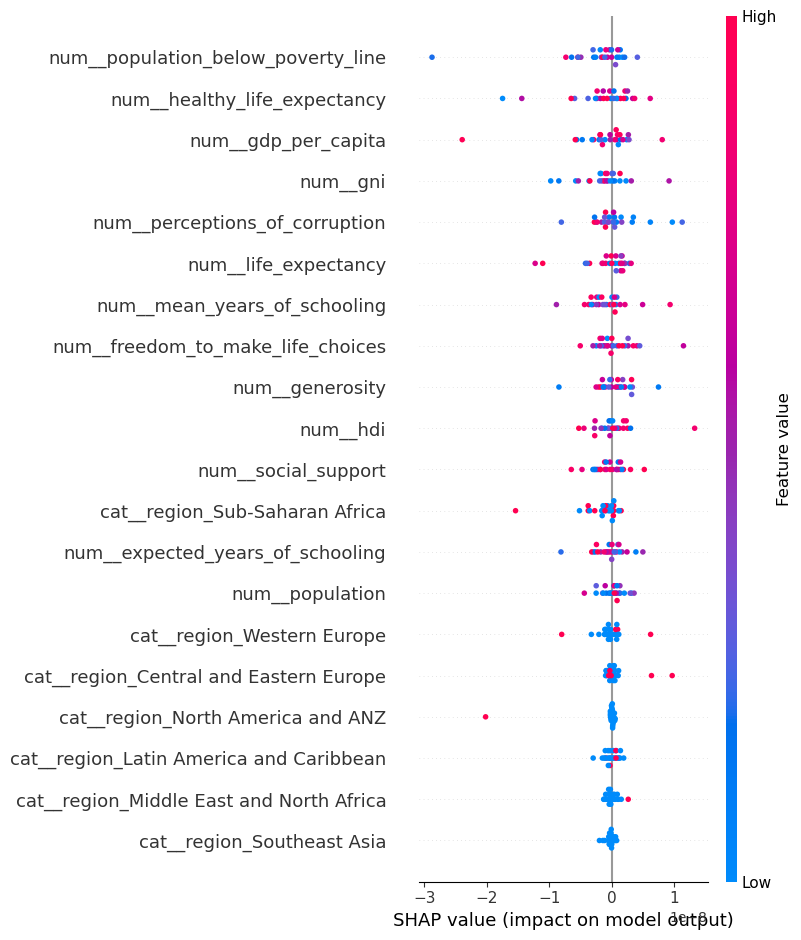

In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.Explainer(keras_model_regularized, X_train_dense)

# Compute SHAP values
shap_values = explainer(X_test_dense)

if len(shap_values.shape) == 3:
    shap_values_to_plot = shap_values.mean(axis=2) Take the mean across classes
else:
    shap_values_to_plot = shap_values

# Generate SHAP summary plot
shap.summary_plot(shap_values_to_plot, X_test_dense, feature_names=preprocessor.get_feature_names_out())

The SHAP summary plot reveals that Population Below Poverty Line, Healthy Life Expectancy, and GDP per Capita have the strongest influence on the model’s predictions. Higher GDP per capita and social support positively impact predictions, while regional factors like Sub-Saharan Africa and Western Europe significantly affect outcomes. Features such as Perceptions of Corruption and Mean Years of Schooling show mixed effects, suggesting complex relationships. The model’s strong reliance on socioeconomic indicators may introduce bias, highlighting the need for careful feature selection and fairness considerations.

<h3> Experimentation

Adding a different dataset, such as economic indicators, might improve the model if the new features provide meaningful signals related to the target variable. However, if the new data does not significantly impact predictions, it could be due to weak correlations between the additional variables and the target, or potential data quality issues like missing values and inconsistencies.
Through experimentation, we noticed that while some additional features improved accuracy slightly, others introduced noise, leading to overfitting. This highlights the importance of feature selection and understanding variable relationships before merging datasets.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

SHAP helps break down my model’s predictions by showing which features influence the outcome the most. It’s useful because it assigns importance scores to each feature, making the model a bit less of a “black box.”

That said, while the visualizations are great, fully explaining every prediction can still be tricky, especially when multiple features interact in complex ways. It gives a solid overview, but justifying specific predictions to someone unfamiliar with SHAP might still take some effort.

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked